# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9381 Худойбердыев Юсуф, вариант 16.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Обыкновенные дифференциальные уравнения (ОДУ) — это уравнения, зависящие от одной независимой переменной, имеющие вид

$$ f(x, y, y', y'', \dots, y^{(n)}) = 0, $$.

Общим решением ОДУ является множество таких функций $y$: $ f(x, y, y', y'', \dots, y^{(n)}) = 0 $.

Задача Коши подразумевает поиск частного решения. Общий вид задачи Коши:

\begin{cases}
    f(x, y, y', y'', \dots, y^{(n)}) = 0 \\
    y(x_0) = y_0 \\
    y'(x_0) = y_1 \\
    y''(x_0) = y_2 \\
    \dots \\
    y^{(n-1)}(x_0) = y_{n-1}
\end{cases}

В рамках данной работы рассматривается дифференциальное уравнение второго порядка:

### $\displaystyle{y''=f(x,y)}$

### Постановка задачи

Дано дифференциальное уравнение:

$\displaystyle{y''=2^x+3^y, 0<x<2}$

и граничные условия:

$\displaystyle{y(0)=1,y(2)=-2}$

Требуется найти решение задачи и построить его график.

Рассмотрим задачу Коши для уравнения с начальными условиями:

$\displaystyle{y(0) = 1, y'(0) = h}$

План решения основан на многократном решении задачи Коши. Значение решения задачи Коши при $\displaystyle{x=2}$ является функцией от $\displaystyle{h}$. Задача сводится к отысканию такого значения переменной $\displaystyle{h}$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться:

$\displaystyle{y(2,h)=-2}$

Это уравнение с одним неизвестным $\displaystyle{h}$. Для его решения можно применить стандартный метод половинного деления.

## Выполнение работы

*Многократно решаем задачу Коши при различных h:*

$\begin{cases}
    y'' = 2^x+3^y \\
    y(0) = 1 \\
    y'(0) = h
\end{cases}$


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Вилка: h in [-3.5, -4.0]
h = -3.909912109375
y(b, h) = -1.9993986713988936


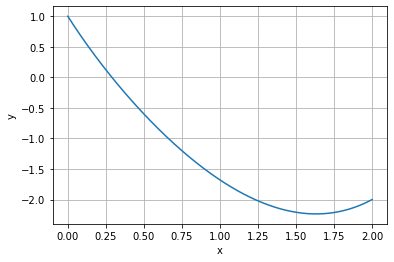

In [5]:
from pylab import *
from scipy.integrate import *

def f(vec, x):
    y, v = vec
    return [v, 2**x + 3**y]

y_a = 1
y_b = -2
h_0 = 0
delta = 0.5

x = linspace(0, 2, 100000)

solve = odeint(f, [y_a, h_0], x)[: ,0]
y_b_h = solve[-1]

if abs(y_b_h - y_b) >= 0.001:
    
    sign_0 = sign(y_b - y_b_h)
    h_left, h_right = None, None

    h = h_0
    for m in range(100):
        h += delta
        solve = odeint(f, [y_a, h], x)[: ,0]
        y_b_h = solve[-1] 
        if sign(y_b - y_b_h) != sign_0: 
            h_left = h - delta
            h_right = h
            print("Вилка: h in [{}, {}]".format(h_left, h_right))
            break
    if h_left == None: 
        h = h_0
        for m in range(100):
            h -= delta
            solve = odeint(f, [y_a, h], x)[: ,0]
            y_b_h = solve[-1] 
            if sign(y_b - y_b_h) != sign_0: 
                h_left = h + delta
                h_right = h
                print("Вилка: h in [{}, {}]".format(h_left, h_right))
                break
    
    if h_left == None: 
        print("\n\033[1mНет решений\n\033[0m")
    else: 
        solveLeft = odeint(f, [y_a, h_left], x)[: ,0] 
        solveRight = solve 
        
        while abs(solveRight[-1] - solveLeft[-1]) >= 0.001: 
            
            mid = (h_left + h_right) / 2 
            solveMid = odeint(f, [y_a, mid], x)[: ,0] 
            
            if sign(y_b - solveMid[-1]) == sign_0: 
                h_left = mid 
                solveLeft = solveMid
            else: 
                h_right = mid
                solveRight = solveMid
    
        plot(x, solveLeft)
        xlabel('x')
        ylabel('y')
        grid()
        print("h = {}\ny(b, h) = {}".format(h_left, solveLeft[-1]))

else:
    plot(x, solve)
    xlabel('x')
    ylabel('y')
    grid()
    print("h = {}\ny(b, h) = {}".format(h_0, solve[-1]))

## Выводы

В ходе практической работы была решена краевая задача для уравнения 2-ого порядка с использованием методов численного интегрирования с определенной точностью.

Были получены следующие результаты:
- $ h = -3.909912109375 $
- $ f(b, h) = -1.9993986713988936 \approx -2 = y_b$

Значение $h$ было найдено с точностью до $0.001$.